# Word2Vec

In [1]:
import pandas as pd

## Raw Data

In [162]:
raw_corpus = [u"国王 是 勇敢的 男人",
              u"国王 是 强壮的 男人",
              u"王后 是 美丽的 女人",
              u"王后 是 动人的 女人",
              u"王子 是 男孩",
              u"公主 是 女孩",
              u"王子 会是 国王",
              u"公主 会是 王后",
              u"男孩 是 年幼的 男人",
              u"女孩 是 年幼的 女人"]

## Remove Stop words

In [163]:
def remove_stop_words(corpus):
    stop_words = [u"是", u"会是"]    
    return [" ".join([w for w in s.split(' ') if w not in stop_words]) for s in corpus]

In [164]:
corpus = remove_stop_words(raw_corpus)

In [165]:
all_words = set().union(*([s.split(' ') for s in corpus]))

In [166]:
all_words

{'公主',
 '动人的',
 '勇敢的',
 '国王',
 '女人',
 '女孩',
 '年幼的',
 '强壮的',
 '王后',
 '王子',
 '男人',
 '男孩',
 '美丽的'}

## Create dataset

In [167]:
word_index = {}

for i, word in enumerate(all_words):
    word_index[word] = i
    
WINDOW_SIZE = 2
data = []
for s in corpus:
    words = s.split()
    for i, word in enumerate(words):        
        for neighbor in words[max(i - WINDOW_SIZE, 0) : min(i + WINDOW_SIZE + 1, len(s))]:
            if word != neighbor:
                data.append([word, neighbor])

df = pd.DataFrame(data, columns = ['input', 'label'])

In [168]:
df.head(52)

,input,label
0,国王,勇敢的
1,国王,男人
2,勇敢的,国王
3,勇敢的,男人
4,男人,国王
5,男人,勇敢的
6,国王,强壮的
7,国王,男人
8,强壮的,国王
9,强壮的,男人


In [169]:
df.shape

(44, 2)

In [170]:
word_index

{'女孩': 0,
 '动人的': 1,
 '王后': 2,
 '公主': 3,
 '国王': 4,
 '王子': 5,
 '年幼的': 6,
 '女人': 7,
 '男人': 8,
 '强壮的': 9,
 '勇敢的': 10,
 '男孩': 11,
 '美丽的': 12}

# Build our model

In [171]:
import tensorflow as tf
import numpy as np

N = len(word_index)

def one_hot_encoding(i):
    v = np.zeros(N)
    v[i] = 1
    return v

In [172]:
X_train = np.asarray([one_hot_encoding(word_index[x]) for x in df['input']])
Y_train = np.asarray([one_hot_encoding(word_index[y]) for y in df['label']])

### Define network

In [182]:
x = tf.placeholder(tf.float32, shape=(None, N))
y = tf.placeholder(tf.float32, shape=(None, N))

# embedding dimesion
E = 2

# hidden layer
W1 = tf.Variable(tf.random_normal([N, E]))
b1 = tf.Variable(tf.random_normal([1]))
hidden_layer = tf.add(tf.matmul(x, W1), b1)

# output layer
W2 = tf.Variable(tf.random_normal([E, N]))
b2 = tf.Variable(tf.random_normal([1]))
pred = tf.nn.softmax(tf.add(tf.matmul(hidden_layer, W2), b2))

# lass: cross_entropy
loss = tf.losses.softmax_cross_entropy(y, pred)

## Training

In [183]:
learning_rate = 0.2
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
iteration = 10000

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

for i in range(iteration):
    sess.run(train_op, feed_dict={x: X_train, y: Y_train})
    if i % 1000 == 0:
        print('iteration %d, loss %0.2f' % (i, sess.run(loss, feed_dict={x: X_train, y: Y_train})))


iteration 0, loss 2.56
iteration 1000, loss 2.44
iteration 2000, loss 2.37
iteration 3000, loss 2.37
iteration 4000, loss 2.37
iteration 5000, loss 2.36
iteration 6000, loss 2.33
iteration 7000, loss 2.33
iteration 8000, loss 2.33
iteration 9000, loss 2.33


In [184]:
pos = sess.run(W1 + b1)
print(pos)

[[-0.675598    4.5472164 ]
 [ 3.2670612   0.7335049 ]
 [-0.669502    3.952902  ]
 [ 3.2681165   0.73440623]
 [ 1.8607508  -1.9840422 ]
 [ 1.467072    2.3861132 ]
 [-1.6547732  -1.2818336 ]
 [ 3.424651    0.72723705]
 [ 1.6738038   2.7049932 ]
 [ 2.5914705  -1.9611752 ]
 [ 2.1014264  -1.8775585 ]
 [ 1.1121513  -1.6537328 ]
 [ 3.2250557   0.71189696]]


## Visualize results

(-1.9840422, 4.5472164)

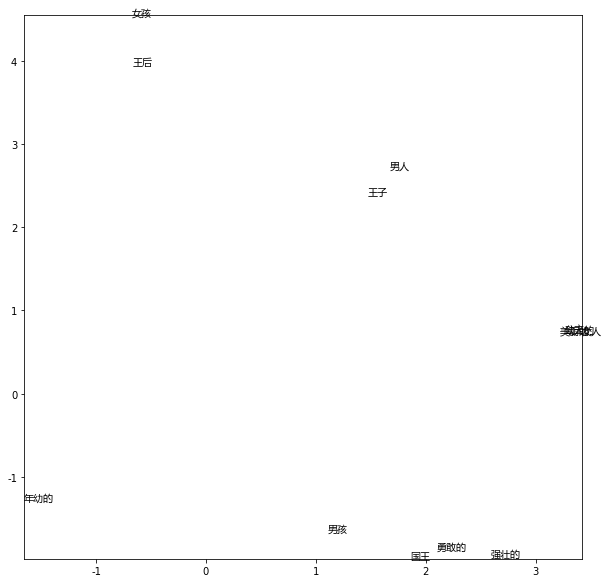

In [185]:
import matplotlib
import matplotlib.pyplot as plt

import matplotlib.font_manager as fm
myfont = fm.FontProperties(fname='C:/Windows/Fonts/msyh.ttc')

fig, ax = plt.subplots()

for word, (x, y) in zip(all_words, pos):
    ax.annotate(word, (x, y), fontproperties=myfont)

plt.xlim(min(pos[:,0]), max(pos[:,0]))
plt.ylim(min(pos[:,1]), max(pos[:,1]))
